## Data Preprocessing:  
1- Week: has a range values between (1-6) and the datatype of the column is int as expected  

2- sales_method: has the correct datatype but has 5 unique values, which means that there are naming-convention errors, fixed them to contain only Email, Email + Call, Call

3- customer_id: has 15000 unique values as expected (no duplicates) as expected

4- nb_sold: has dtype int64 and does not have missing values.
   Additionally, it does not seem like there are any alarming outliers.
   
5- revenue: has the correct datatype, but contains 1074 missing values, which should be removed because the entire analysis is based around this column, so skeweing the results in one way or another would have drastic effects.
After removing the missing values, there are 13926 rows left.
Additionally, if we look at the revenue while accounting for the sales method, we can find "outliers" in the email and call methods, but not for the email + call method.

6- years_as_customer: has type int64 as expected, but the range of values seems wrong, it is currently 2023, and the country was founded in 1984, which means the largest number in the range has to be 39, but there are entries where the number exeeds that. We need to inform the team of this issue.
For the meantime, I will ommit the two entries where that is the case, leaving 13924 entries left.

7- nb_site_visits: has the type int64 as expected, and there aren't any missing values or extreme outliers.

8- state: has the correct dtype, and has 50 unique values, which matches the number of states in the US. Upon exammining them, they seem to be correct.

## Exploratory Analysis:  
1- The email method seems to be the most used method, followed by the call method and the email + call method.  
2- The revenue column does not seem to follow a known distribution, perhaps that could be explained by the other variables.  
3- The email + call method seems to be by far the best method, followed by email and call.  

## Business metric:
I would suggest using both the revenue produced by the sales method and the time/resources needed for it.

Because the distribution of the revenue is not normall even when we account for the sales method, I used the kruskul-Wallis H test to see if there is a statistically significant difference between the groups, and the test came back positive.  
Additionally, because of distribution reasons, I used the median as the statistic describing the revenue:  
Call : 49.05
Email : 95.58
Email + Call: 184.74

## Final summary:  
I suggest switching from the call method to the email + call method, since it is still heavily used due to the fact that the call method requires more time (30 minutes) and is producing, on average, less revenue.  
Whether to replace the email method too requires further investigation and additional data, but for now, it is better to focus on switching from the call method.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('product_sales.csv')
df.dtypes

week                   int64
sales_method          object
customer_id           object
nb_sold                int64
revenue              float64
years_as_customer      int64
nb_site_visits         int64
state                 object
dtype: object

In [3]:
df.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [4]:
dict_replace = {'em + call':'Email + Call', 'email':'Email','Call':'Call'}
df['sales_method'] = df['sales_method'].replace(dict_replace)

In [5]:
df['customer_id'].duplicated().sum()

0

<AxesSubplot: xlabel='nb_sold', ylabel='Density'>

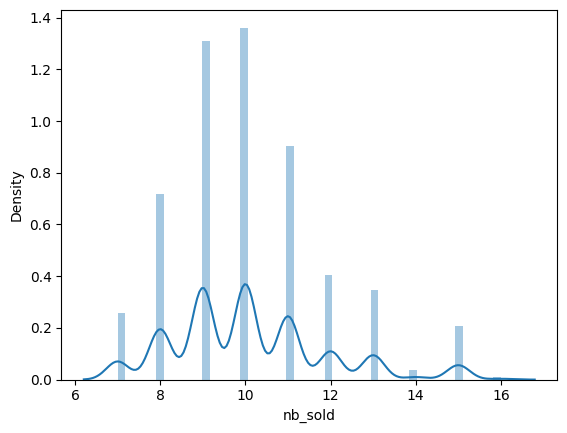

In [6]:
sns.distplot(df['nb_sold'],)

In [7]:
df = df[df['revenue'].notna()]
for i in df['sales_method'].unique():
    sub = df[df['sales_method'] == i][['revenue','sales_method']]
    q1 = sub['revenue'].quantile(0.25)
    q3 = sub['revenue'].quantile(0.75)
    iqr = q3 - q1
    cond = cond = (sub['revenue'] > (1.5 * iqr + q3)) | (sub['revenue'] < (1.5 * iqr - q1))
    sub_outliers = sub[cond]
    print(sub_outliers)

Empty DataFrame
Columns: [revenue, sales_method]
Index: []
       revenue sales_method
776      70.31         Call
2243     70.16         Call
2600     71.04         Call
4127     69.61         Call
4246     69.52         Call
6095     70.69         Call
6942     71.06         Call
7060     70.67         Call
7728     71.36         Call
8802     69.90         Call
10013    70.11         Call
13657    69.60         Call
       revenue sales_method
191     132.01        Email
397     133.26        Email
403     133.30        Email
638     133.59        Email
817     135.42        Email
...        ...          ...
14575   131.71        Email
14680   131.16        Email
14780   134.39        Email
14938   136.47        Email
14959   134.37        Email

[87 rows x 2 columns]


In [8]:
df['years_as_customer'].unique()

array([ 1,  6,  0, 10,  9,  7,  4,  2, 20,  8,  5, 17, 36,  3, 15, 14, 19,
       13, 12, 11, 30, 22, 18, 23, 32, 16, 39, 25, 33, 21, 31, 24, 27, 34,
       28, 26, 29, 35, 38, 37, 63, 47])

In [9]:
df = df[df['years_as_customer'] <= 39]

<AxesSubplot: xlabel='nb_site_visits', ylabel='Density'>

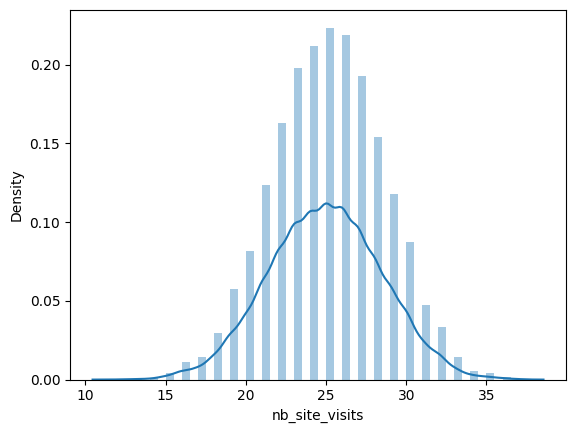

In [10]:
df['nb_site_visits'].unique()
sns.distplot(df['nb_site_visits'])

In [11]:
print(len(df['state'].unique()))
df['state'].unique()

50


array(['Kansas', 'Wisconsin', 'Illinois', 'Mississippi', 'Georgia',
       'Oklahoma', 'Massachusetts', 'Missouri', 'Texas', 'New York',
       'Maryland', 'California', 'Tennessee', 'North Dakota', 'Florida',
       'Michigan', 'North Carolina', 'Pennsylvania', 'Indiana', 'Hawaii',
       'Colorado', 'Louisiana', 'Virginia', 'Arkansas', 'Alaska',
       'Oregon', 'New Hampshire', 'Ohio', 'New Jersey', 'Connecticut',
       'Iowa', 'Montana', 'Washington', 'Arizona', 'Kentucky', 'Alabama',
       'Nebraska', 'South Carolina', 'Minnesota', 'South Dakota', 'Maine',
       'Utah', 'West Virginia', 'Vermont', 'New Mexico', 'Rhode Island',
       'Nevada', 'Delaware', 'Idaho', 'Wyoming'], dtype=object)

In [12]:
df['sales_method'].value_counts()

Email           6921
Call            4780
Email + Call    2223
Name: sales_method, dtype: int64

<AxesSubplot: xlabel='sales_method', ylabel='count'>

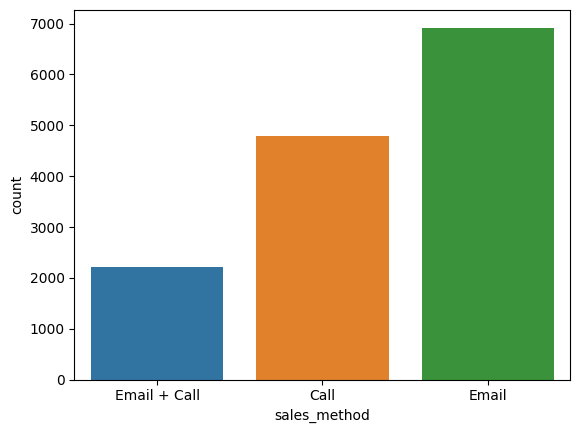

In [13]:
sns.countplot(x = 'sales_method', data = df)

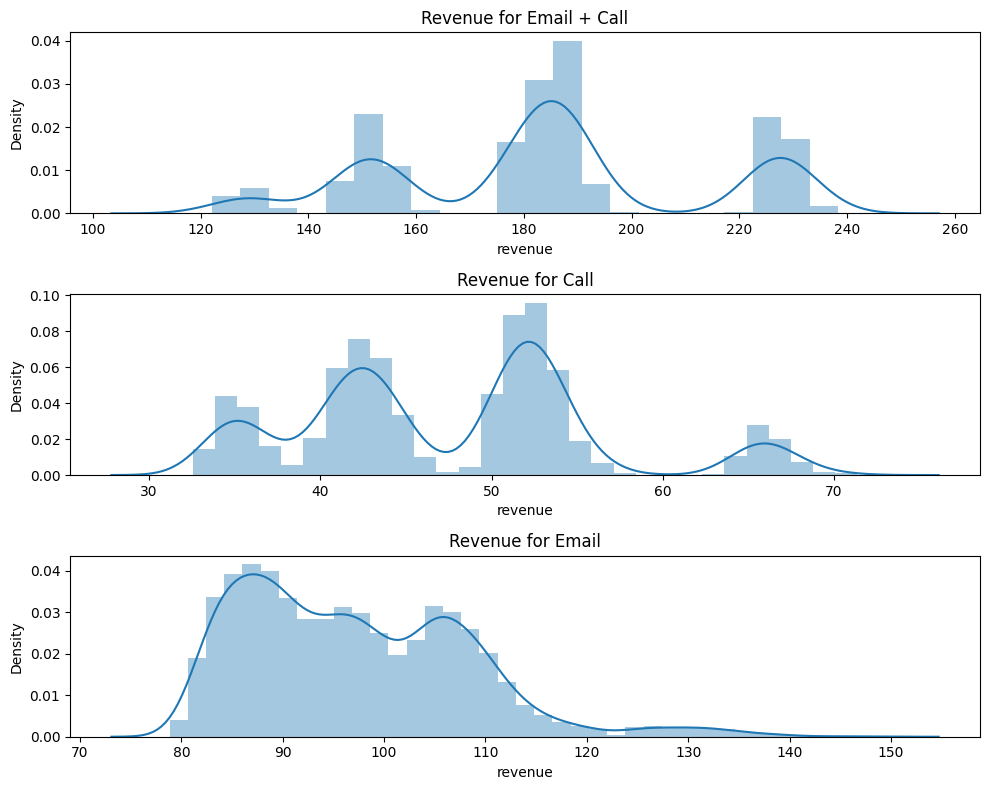

In [14]:
fig, ax = plt.subplots(len(df['sales_method'].unique()), figsize = (10,8))
for j,i in enumerate(df['sales_method'].unique()):
    data = df[df['sales_method'] == i]['revenue']
    sns.distplot(data, ax=ax[j])
    ax[j].set_title(f'Revenue for {i}')
    
plt.tight_layout()

[Text(0, 0.5, '')]

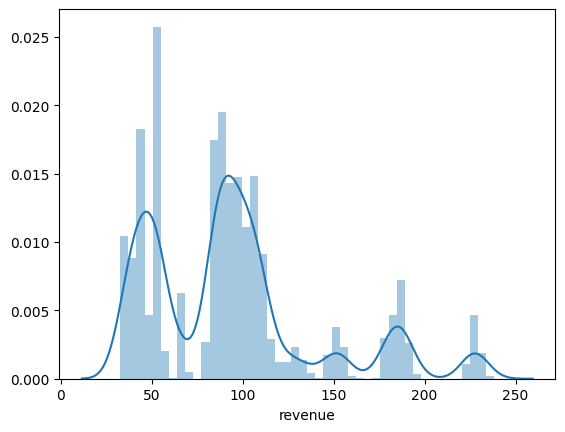

In [19]:
ax = sns.distplot(df['revenue'])
ax.set(ylabel = '')

<AxesSubplot: xlabel='revenue', ylabel='sales_method'>

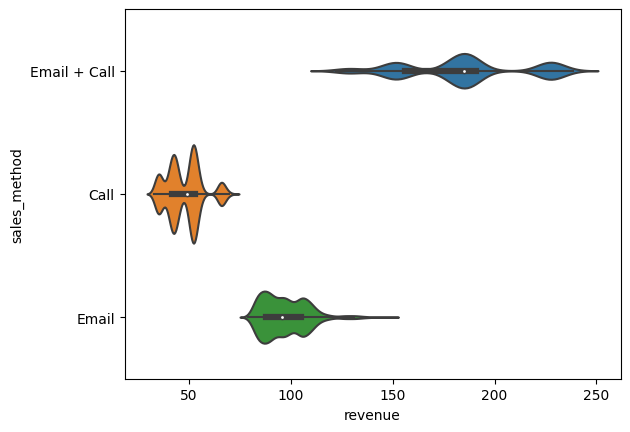

In [16]:
sns.violinplot(x = df['revenue'], y = df['sales_method'], orient='h')

In [17]:
data = []
for i in df['sales_method'].unique():
    curr = df.loc[df['sales_method'] == i, 'revenue']
    data.append(curr)
from scipy.stats import kruskal
stat, p = kruskal(data[0], data[1], data[2])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p < 0.05:
    print('The test is statistically significant')

Statistics=11584.292, p=0.000
The test is statistically significant


In [18]:
df[['sales_method', 'revenue']].groupby('sales_method').median()

,revenue
sales_method,
Call,49.05
Email,95.58
Email + Call,184.74
